# Import

## Mount drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import libraries

In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
import os

In [ ]:
import sys

In [ ]:
import time

In [ ]:
import requests

In [ ]:
import re

In [ ]:
import cv2

In [ ]:
from scipy.cluster.vq import whiten
from scipy.cluster.vq import kmeans

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
import seaborn as sns

In [ ]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [ ]:
import warnings
warnings.simplefilter("ignore")

## Import BeautifulSoup

In [ ]:
from bs4 import BeautifulSoup

## Install Selenium

In [ ]:
!pip install selenium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 467.7/467.7 kB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.2 MB/s eta 0:00:00


In [ ]:
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions
from selenium.webdriver.common.by import By

## Install ChromeDriver Autoinstaller

In [ ]:
!mkdir Chrome

In [ ]:
cd /content/Chrome

/content/Chrome


In [ ]:
%%shell
sudo apt -y update
sudo apt install -y wget curl unzip
wget http://archive.ubuntu.com/ubuntu/pool/main/libu/libu2f-host/libu2f-udev_1.1.4-1_all.deb
dpkg -i libu2f-udev_1.1.4-1_all.deb
wget https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
dpkg -i google-chrome-stable_current_amd64.deb

wget -N https://edgedl.me.gvt1.com/edgedl/chrome/chrome-for-testing/118.0.5993.70/linux64/chromedriver-linux64.zip -P /tmp/
unzip -o /tmp/chromedriver-linux64.zip -d /tmp/
chmod +x /tmp/chromedriver-linux64/chromedriver
mv /tmp/chromedriver-linux64/chromedriver /usr/local/bin/chromedriver
pip install selenium chromedriver_autoinstaller

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:6 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [917 kB]
Get:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,389 kB]
Get:13 h

In [ ]:
cd ..

/content


In [ ]:
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

In [ ]:
import chromedriver_autoinstaller

## Import models

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler

# Crawl data

In [ ]:
# !mkdir '/content/drive/MyDrive/UIT/HK4/Tiền xử lý và xây dựng bộ dữ liệu/Đồ án TXL&XDBDL/Data/Raw data'

In [ ]:
# !mkdir /content/drive/MyDrive/UIT/HK4/Tiền xử lý và xây dựng bộ dữ liệu/Đồ án TXL&XDBDL/Data/Raw data/Official'

In [ ]:
cd '/content/drive/MyDrive/UIT/HK4/Tiền xử lý và xây dựng bộ dữ liệu/Đồ án TXL&XDBDL/Data/Raw data/Official'

/content/drive/MyDrive/UIT/HK4/Tiền xử lý và xây dựng bộ dữ liệu/Đồ án TXL&XDBDL/Data/Raw data/Official


In [ ]:
# Tạo thư mục và thay đổi thư mục làm việc hiện tại thành thư mục được tạo
def create_folder(folder_name):
    # Lấy đường dẫn của thư mục hiện hành
    current_directory = os.getcwd()

    # Tạo đường dẫn tới thư mục được tạo
    new_folder_path = os.path.join(current_directory, folder_name)

    if not os.path.exists(new_folder_path):
        # Tạo thư mục
        os.mkdir(new_folder_path)

        # Thay đổi thư mục hiện hành thành thư mục được tạo
        os.chdir(new_folder_path)

In [ ]:
# Hoa cần crawl
color_flowers = {
    'red_flowers': ['Red Rosa', 'Red Tulipa', 'Red Lilium'],
    'yellow_flowers': ['Helianthus Annuus'],
    'blue_flowers': ['Evolvulus Alsinoides', 'Aster Amellus', 'Platycodon Grandiflorum'],
    'purple_flowers': ['Lavandula Angustifolia'],
    'white_flowers': ['Tanacetum Parthenium', 'Lilium Longiflorum', 'White Tulipa'],
    'pink_flowers': ['Pink Tulipa', 'Pink Nelumbo Nucifera', 'Dianthus'],
}

In [ ]:
# Truy cập vào link ảnh và lưu ảnh đó vào thư mục hiện hành
def save_image(link, file_name):
    # Gửi yêu cầu HTTP GET đến link ảnh
    response = requests.get(link, headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.114 Safari/537.36'})

    if response.status_code == 200:
        # Lưu ảnh
        with open(f'{file_name}.jpg', 'wb') as file:
            file.write(response.content)
    else:
        # In ra lỗi
        print('Error:', response.status_code, response.text)

## Crawl 1 (BeautifulSoup)

In [ ]:
# !mkdir '/content/drive/MyDrive/UIT/HK4/Tiền xử lý và xây dựng bộ dữ liệu/Đồ án TXL&XDBDL/Data/Raw data/Official/Crawl 1'

In [ ]:
cd '/content/drive/MyDrive/UIT/HK4/Tiền xử lý và xây dựng bộ dữ liệu/Đồ án TXL&XDBDL/Data/Raw data/Official/Crawl 1'

/content/drive/MyDrive/UIT/HK4/Tiền xử lý và xây dựng bộ dữ liệu/Đồ án TXL&XDBDL/Data/Raw data/Official/Crawl 1


In [ ]:
# Crawl ảnh bằng BeautifulSoup
## Pexels
def fetch_pexels_images_beautifulsoup(flower, file_name):
    response_pexels = requests.get(f'https://api.pexels.com/v1/search?&query={flower}&per_page=100', headers = {'Authorization': 'sugq3B6XBSAGYujHhbI2qumhqv8a423tWm9TkMyluSfJx56H6owSmFEH'})

    if response_pexels.status_code == 200:
        # Chuyển đổi nội dung của kết quả trả về từ một định dạng dữ liệu JSON sang một cấu trúc dữ liệu Python
        data_pexels = response_pexels.json()

        # Duyệt qua các tag ảnh và lưu ảnh lại với tên là file_name (được đánh theo số thứ tự)
        for tag in data_pexels['photos']:
            save_image(tag['src']['original'], file_name)
            file_name += 1
    else:
        print('Error:', response_pexels.status_code, response_pexels.text)

    return file_name

## Unsplash
def fetch_unsplash_images_beautifulsoup(flower, file_name):
    response_unsplash = requests.get(f'https://api.unsplash.com/search/photos?client_id=zsRoViNqmvwZN4CY8OTHju65zxeIAPrVz9k7-Bo6o3U&query={flower}')

    if response_unsplash.status_code == 200:
        data_unsplash = response_unsplash.json()

        for tag in data_unsplash['results']:
            save_image(tag['urls']['raw'], file_name)
            file_name += 1
    else:
        print('Error:', response_unsplash.status_code, response_unsplash.text)

    return file_name

## Pixabay
def fetch_pixabay_images_beautifulsoup(flower, file_name):
    response_pixabay = requests.get(f'https://pixabay.com/api/?key=44260413-4924084fe971176f870456766&q={flower}&image_type=photo')

    if response_pixabay.status_code == 200:
        data_pixabay = response_pixabay.json()

        for tag in data_pixabay['hits']:
            save_image(tag['largeImageURL'], file_name)
            file_name += 1
    else:
        print('Error:', response_pixabay.status_code, response_pixabay.text)

    return file_name

In [ ]:
for color in color_flowers:
    create_folder(color)

    for flower in color_flowers[color]:
        create_folder(flower)

        file_name = 0
        file_name = fetch_pexels_images_beautifulsoup(flower, file_name)
        file_name = fetch_unsplash_images_beautifulsoup(flower, file_name)
        file_name = fetch_pixabay_images_beautifulsoup(flower, file_name)

        os.chdir('..')

    os.chdir('..')

## Crawl 2 (Selenium)

In [ ]:
# !mkdir '/content/drive/MyDrive/UIT/HK4/Tiền xử lý và xây dựng bộ dữ liệu/Đồ án TXL&XDBDL/Data/Raw data/Official/Crawl 2'

In [ ]:
cd '/content/drive/MyDrive/UIT/HK4/Tiền xử lý và xây dựng bộ dữ liệu/Đồ án TXL&XDBDL/Data/Raw data/Official/Crawl 2'

/content/drive/MyDrive/UIT/HK4/Tiền xử lý và xây dựng bộ dữ liệu/Đồ án TXL&XDBDL/Data/Raw data/Official/Crawl 2


In [ ]:
# Cài đặt chromedriver
## Tạo đối tượng Chrome
chrome_options = webdriver.ChromeOptions()

## Thêm tùy chọn
chrome_options.add_argument('--headless') # Trình duyệt không hiển thị khi chạy
chrome_options.add_argument('--no-sandbox') # Tắt tính năng sandbox để chạy ChromeDriver trong môi trường khác (không phải môi trường sandbox)
chrome_options.add_argument('--disable-dev-shm-usage') # Vô hiệu hóa việc sử dụng bộ nhớ chia sẻ khi chạy

## Tự động cài đặt phiên bản ChromeDriver phù hợp với trình duyệt Chrome đã cài đặt trong hệ thống
chromedriver_autoinstaller.install()

'/usr/local/lib/python3.10/dist-packages/chromedriver_autoinstaller/125/chromedriver'

In [ ]:
# Crawl ảnh bằng selenium (Wikimedia commons)
def fetch_wikimedia_commons_images_selenium(flower):
    # Tạo phiên bản của WebDriver cho trình duyện Chrome
    driver = webdriver.Chrome(options = chrome_options)

    # Mở đường dẫn trong WebDriver
    driver.get(f'https://commons.wikimedia.org/w/index.php?search={flower}&title=Special:MediaSearch&fulltext=Search&type=image')
    time.sleep(1) # Chương trình tạm dừng để trang web có thời gian để tải

    # Tải tất cả ảnh từ đường dẫn
    while True:
        try:
            ## Click vào Load More để tải thêm ảnh
            wait = WebDriverWait(driver, 100) # Tạo đối tượng WebDriverWait
            button = wait.until(expected_conditions.element_to_be_clickable((By.CSS_SELECTOR, '.cdx-button.cdx-button--action-progressive.cdx-button--weight-normal.cdx-button--size-medium.cdx-button--framed.sdms-load-more'))) # Tìm phần tử Load More và lưu vào button
            button.click() # Click vào button

            ## Kéo xuống cuối trang
            ### Lấy chiều cao của toàn bộ nội dung hiện tại và lưu vào biến last_height
            last_height = driver.execute_script("return document.body.scrollHeight")

            while True:
                ### Cuộn trang xuống dưới cùng
                driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
                time.sleep(0.5)

                ### Lấy chiều cao của toàn bộ nội dung sau khi cuộn trang và lưu vào biến new_height
                new_height = driver.execute_script("return document.body.scrollHeight")

                ### Nếu đã cuộn trang xuống dưới cùng thì break
                if new_height == last_height:
                    break

                ### Gán chiều cao hiện tại thành chiều cao sau khi cuộn trang
                last_height = new_height
        except:
            break

    # Tìm tất cả các phần tử có chứa ảnh
    elements = driver.find_elements(By.CLASS_NAME, 'sd-image')

    # Tìm link ảnh thuộc các phần tử đó
    links = [element.get_attribute('data-src') for element in elements]

    # Truy cập vào link ảnh và lưu ảnh
    file_name = 0
    for link in links:
        save_image(link, file_name)
        file_name += 1

    # Đóng tất cả các cửa sổ và kết thúc phiên làm việc của WebDriver
    driver.quit()

In [ ]:
for color in color_flowers:
    create_folder(color)

    for flower in color_flowers[color]:
        create_folder(flower)

        fetch_wikimedia_commons_images_selenium(flower)

        os.chdir('..')

    os.chdir('..')

# Preprocess image data

## Format data

In [ ]:
filtered_data_path = '/content/drive/MyDrive/UIT/HK4/Tiền xử lý và xây dựng bộ dữ liệu/Đồ án TXL&XDBDL/Data/Filtered data/Filtered 2'

In [ ]:
# !mkdir '/content/drive/MyDrive/UIT/HK4/Tiền xử lý và xây dựng bộ dữ liệu/Đồ án TXL&XDBDL/Data/Official data/Tidy data'

In [ ]:
data_path = '/content/drive/MyDrive/UIT/HK4/Tiền xử lý và xây dựng bộ dữ liệu/Đồ án TXL&XDBDL/Data/Official data/Tidy data'

In [ ]:
# Lưu và đặt lại tên tất cả ảnh đã lọc vào thư mục Tidy data
index = 0
for color in os.listdir(filtered_data_path):
    for flower in os.listdir(os.path.join(filtered_data_path, color)):
        for image in os.listdir(os.path.join(filtered_data_path, color, flower)):
            temp_image = cv2.imread(os.path.join(filtered_data_path, color, flower, image))
            file_name = os.path.join(data_path, flower + '_' + str(index) + '.jpg')
            cv2.imwrite(file_name, temp_image)
            index += 1

## Delete background

In [ ]:
# !mkdir '/content/drive/MyDrive/UIT/HK4/Tiền xử lý và xây dựng bộ dữ liệu/Đồ án TXL&XDBDL/Data/Official data/Background-deleted data'

In [ ]:
preprocessed_data_path = '/content/drive/MyDrive/UIT/HK4/Tiền xử lý và xây dựng bộ dữ liệu/Đồ án TXL&XDBDL/Data/Official data/Background-deleted data'

In [ ]:
def kmeans_lab_otsu_mask(image_path):
    # Đọc ảnh
    image = cv2.imread(image_path)

    # Resize ảnh
    image = cv2.resize(image, (128, 128))

    # Filter median (5x5)
    filtered_image = cv2.medianBlur(image, 5)

    # Phân đoạn ảnh
    ## Dùng model KMeans
    nrow, ncol, nchl = filtered_image.shape
    g = filtered_image.reshape(nrow * ncol, nchl)

    k_means = KMeans(n_clusters = 6, random_state = 0)
    k_means.fit(g)

    t = k_means.cluster_centers_[k_means.labels_]

    image_kmeans = t.reshape(nrow, ncol, nchl)
    image_kmeans = image_kmeans.astype(np.uint8)

    ## Chuyển ảnh từ hệ màu RGB sang hệ màu LAB rồi chuyển đến hệ màu Grayscale
    image_kmeans = cv2.cvtColor(image_kmeans, cv2.COLOR_RGB2LAB)
    gray_image = cv2.cvtColor(image_kmeans, cv2.COLOR_RGB2GRAY)

    ## Áp dụng Otsu's thresholding
    thresh = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

    ## Tạo mask từ ảnh phân đoạn
    mask = cv2.inRange(thresh, 255, 255)

    ## In ảnh ban đầu lên vùng đã mask của ảnh K-Means
    background_deleted_image = cv2.bitwise_and(image, image, mask = mask)

    return background_deleted_image

In [ ]:
for image in os.listdir(os.path.join(data_path)):
    temp_image = kmeans_lab_otsu_mask(os.path.join(data_path, image))
    file_name = os.path.join(preprocessed_data_path, image)
    cv2.imwrite(file_name, temp_image)

## Extract features

### Load label

In [ ]:
def load_dataset(path):
    # Tạo list lưu ảnh và label
    X_image = []
    y = []

    nrow, ncol = 227, 227

    for image in os.listdir(path):
        file_name = image.split('_')
        name = file_name[0]

        X_image.append(image)
        y.append(name)

    X_image = np.array(X_image)
    y = np.array(y)

    return X_image, y

In [ ]:
X_image, y = load_dataset(preprocessed_data_path)

In [ ]:
X_image

array(['Platycodon Grandiflorum_0.jpg', 'Platycodon Grandiflorum_1.jpg',
       'Platycodon Grandiflorum_2.jpg', ..., 'White Tulipa_1664.jpg',
       'White Tulipa_1665.jpg', 'White Tulipa_1666.jpg'], dtype='<U31')

In [ ]:
y

array(['Platycodon Grandiflorum', 'Platycodon Grandiflorum',
       'Platycodon Grandiflorum', ..., 'White Tulipa', 'White Tulipa',
       'White Tulipa'], dtype='<U23')

### Extract features of colors

In [ ]:
# Lấy các màu chủ đạo của ảnh
def get_dominant_colors(image_path):
    # Đọc ảnh
    image = mpimg.imread(image_path)
    w, h, d = tuple(image.shape) # Trích xuất chiều rộng, chiều cao và kênh màu của ảnh
    pixels = np.reshape(image, (w * h, d)) # Biến đổi mảng thành mảng 2 chiều (hàng là điểm ảnh, cột là kênh màu)

    # Dùng model KMeans
    k_means = KMeans(n_clusters = 2, random_state = 42)
    k_means.fit(pixels)

    # Lưu các màu chủ đạo
    palette = np.uint8(k_means.cluster_centers_)

    return palette

# Lấy màu của hoa
def get_flower_color(colors):
    black = [0, 0, 0]
    distances = []

    for color in colors:
      # Tính khoảng cách Euclidean giữa các màu với màu đen
      distance = np.linalg.norm(np.array(color) - np.array(black))
      distances.append(distance)

    # Tìm vị trí của màu có khoảng cách xa nhất
    further_color_index = distances.index(max(distances))

    return colors[further_color_index]

# Trích xuất đặc trưng màu
def extract_color_feature(X_images, path):
    # Tạo list lưu giá trị các biến màu của các hệ màu
    ## Hệ màu LAB
    X_l = []
    X_a = []
    X_b = []

    ## Hệ màu HSV
    X_h = []
    X_s = []
    X_v = []

    for image in X_images:
        # Lấy màu của hoa
        palette = get_dominant_colors(os.path.join(path, image))
        flower_color = get_flower_color(palette)

        # Chuyển đổi sang 2 hệ màu LAB và HSV
        flower_color = np.array(flower_color, dtype = np.uint8).reshape(1, 1, 3)
        lab = cv2.cvtColor(flower_color, cv2.COLOR_RGB2LAB)
        lab = lab[0][0]
        hsv = cv2.cvtColor(flower_color, cv2.COLOR_RGB2HSV)
        hsv = hsv[0][0]

        # Lưu giá trị của các biến màu của các hệ màu
        X_l.append(np.array(lab[0]))
        X_a.append(np.array(lab[1]))
        X_b.append(np.array(lab[2]))
        X_h.append(np.array(hsv[0]))
        X_s.append(np.array(hsv[1]))
        X_v.append(np.array(hsv[2]))

    # Chuyển sang mảng array
    X_l = np.array(X_l)
    X_a = np.array(X_a)
    X_b = np.array(X_b)
    X_h = np.array(X_h)
    X_s = np.array(X_s)
    X_v = np.array(X_v)

    return X_l, X_a, X_b, X_h, X_s, X_v

In [ ]:
X_l, X_a, X_b, X_h, X_s, X_v = extract_color_feature(X_image, preprocessed_data_path)

### Extract features of edge

In [ ]:
# Dùng bộ lọc Sobel
def sobel_filters(image):
    # Tạo ma trận bộ lọc Sobel
    Sx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32) # Theo hướng x
    Sy = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32) # Theo hướng y

    # Áp dụng bộ lọc Sobel lên ảnh
    Ix = cv2.filter2D(image, -1, Sx)
    Iy = cv2.filter2D(image, -1, Sy)

    # Tính gradient
    G = np.hypot(Ix, Iy) # Tính biên độ của gradient
    G = G / G.max() * 255 # Chuẩn hóa biên độ của gradient
    theta = np.arctan2(Iy, Ix) # Tính toán hướng của gradient

    return Ix, Iy, G, theta

# Tính toán vector đặc trưng
def calculate_sobel_feature_vector(image_source):
    image_destination = image_source.copy()
    image_destination = cv2.resize(image_destination, (256, 256))
    Ix, Iy, G, theta  = sobel_filters(image_destination)

    # Tính tổng của giá trị biên độ gradient
    feature = []

    ## Theo hàng
    for i in range(G.shape[0]):
        temp = 0
        for j in range(G.shape[1]):
            temp = temp + G[i, j]
        feature.append(temp)

    ## Theo cột
    for j in range(G.shape[1]):
        temp = 0
        for i in range(G.shape[0]):
            temp = temp + G[i, j]
        feature.append(temp)

    return feature

# Trích xuất đặc trưng cạnh
def extract_features_of_edge_sobel(X_image, path):
    X_edge = []

    for image in X_image:
      image_source = cv2.imread(os.path.join(path, image), 0)
      edge = calculate_sobel_feature_vector(image_source)

      # Lưu giá trị các biến cạnh
      X_edge.append(np.array(edge))

    X_edge = np.array(X_edge)

    return X_edge

In [ ]:
X_edge_sobel = extract_features_of_edge_sobel(X_image, preprocessed_data_path)

In [ ]:
# Dùng bộ lọc Prewitt
def prewitt_filters(image):
    # Tạo ma trận bộ lọc Prewitt
    Sx = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], np.float32) # Theo hướng x
    Sy = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], np.float32) # Theo hướng y

    # Áp dụng bộ lọc Prewitt lên ảnh
    Ix = cv2.filter2D(image, -1, Sx)
    Iy = cv2.filter2D(image, -1, Sy)

    # Tính gradient
    G = np.hypot(Ix, Iy)
    G = G / G.max() * 255
    theta = np.arctan2(Iy, Ix)

    return Ix, Iy, G, theta

# Tính toán vector đặc trưng
def calculate_prewitt_feature_vector(image_source):
    image_destination = image_source.copy()
    image_destination = cv2.resize(image_destination, (256, 256))
    Ix, Iy, G, theta  = prewitt_filters(image_destination)

    # Tính tổng của giá trị biên độ gradient
    feature = []

    ## Theo hàng
    for i in range(G.shape[0]):
        temp = 0
        for j in range(G.shape[1]):
            temp = temp + G[i, j]
        feature.append(temp)

    ## Theo cột
    for j in range(G.shape[1]):
        temp = 0
        for i in range(G.shape[0]):
            temp = temp + G[i, j]
        feature.append(temp)

    return feature

# Trích xuất đặc trưng cạnh
def extract_features_of_edge_prewitt(X_image, path):
    X_edge = []

    for image in X_image:
      image_source = cv2.imread(os.path.join(path, image), 0)
      edge = calculate_prewitt_feature_vector(image_source)

      # Lưu giá trị các biến cạnh
      X_edge.append(np.array(edge))

    X_edge = np.array(X_edge)

    return X_edge

In [ ]:
X_edge_prewitt = extract_features_of_edge_prewitt(X_image, preprocessed_data_path)

In [ ]:
# Dùng bộ lọc Scharr
def scharr_filters(image):
    # Tạo ma trận bộ lọc Scharr
    Sx = np.array([[3, 0, -3], [10, 0, -10], [3, 0, -3]], np.float32)  # Theo hướng x
    Sy = np.array([[3, 10, 3], [0, 0, 0], [-3, -10, -3]], np.float32)  # Theo hướng y

    # Áp dụng bộ lọc Scharr lên ảnh
    Ix = cv2.filter2D(image, -1, Sx)
    Iy = cv2.filter2D(image, -1, Sy)

    # Tính gradient
    G = np.hypot(Ix, Iy)
    G = G / G.max() * 255
    theta = np.arctan2(Iy, Ix)

    return Ix, Iy, G, theta

# Tính toán vector đặc trưng
def calculate_scharr_feature_vector(image_source):
    image_destination = image_source.copy()
    image_destination = cv2.resize(image_destination, (256, 256))
    Ix, Iy, G, theta  = scharr_filters(image_destination)

    # Tính tổng của giá trị biên độ gradient
    feature = []

    ## Theo hàng
    for i in range(G.shape[0]):
        temp = 0
        for j in range(G.shape[1]):
            temp = temp + G[i, j]
        feature.append(temp)

    ## Theo cột
    for j in range(G.shape[1]):
        temp = 0
        for i in range(G.shape[0]):
            temp = temp + G[i, j]
        feature.append(temp)

    return feature

# Trích xuất đặc trưng cạnh
def extract_features_of_edge_scharr(X_image, path):
    X_edge = []

    for image in X_image:
      image_source = cv2.imread(os.path.join(path, image), 0)
      edge = calculate_scharr_feature_vector(image_source)

      # Lưu giá trị các biến cạnh
      X_edge.append(np.array(edge))

    X_edge = np.array(X_edge)

    return X_edge

In [ ]:
X_edge_scharr = extract_features_of_edge_scharr(X_image, preprocessed_data_path)

# Data

In [ ]:
X = pd.concat([pd.DataFrame(X_l),
               pd.DataFrame(X_a),
               pd.DataFrame(X_b),
               pd.DataFrame(X_h),
               pd.DataFrame(X_s),
               pd.DataFrame(X_v),
               pd.DataFrame(X_edge_sobel)],
              axis = 1)
X.columns = [i for i in range(X.shape[1])]

In [ ]:
X_prewitt = pd.concat([pd.DataFrame(X_l),
               pd.DataFrame(X_a),
               pd.DataFrame(X_b),
               pd.DataFrame(X_h),
               pd.DataFrame(X_s),
               pd.DataFrame(X_v),
               pd.DataFrame(X_edge_prewitt)],
              axis = 1)
X_prewitt.columns = [i for i in range(X.shape[1])]

In [ ]:
X_scharr = pd.concat([pd.DataFrame(X_l),
               pd.DataFrame(X_a),
               pd.DataFrame(X_b),
               pd.DataFrame(X_h),
               pd.DataFrame(X_s),
               pd.DataFrame(X_v),
               pd.DataFrame(X_edge_scharr)],
              axis = 1)
X_scharr.columns = [i for i in range(X.shape[1])]

In [ ]:
X

,0,1,2,3,4,5,6,7,8,9,...,508,509,510,511,512,513,514,515,516,517
0,164,142,102,125,67,202,2589.644531,3548.564453,3969.148438,4410.107422,...,4154.255859,3523.597656,2768.615234,2252.742188,2022.808594,2087.765625,1961.517578,1680.625000,1552.306641,1427.386719
1,149,152,99,134,84,191,4153.683594,4890.416016,5098.943359,4688.347656,...,1077.972656,1225.533203,926.642578,737.685547,895.429688,1411.603516,2220.298828,2517.167969,2415.894531,1479.160156
2,124,156,81,124,122,195,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,135,151,94,129,96,184,1974.898438,3777.822266,4099.376953,3835.964844,...,467.509766,123.625000,48.078125,39.576172,39.125000,53.281250,55.962891,58.931641,60.607422,43.847656
4,171,139,104,121,59,207,1353.160156,1740.273438,1795.685547,1749.365234,...,5072.384766,5735.917969,5678.136719,4310.005859,3509.644531,2094.259766,1751.933594,1908.498047,2403.416016,1925.445312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1662,167,127,133,27,18,160,2434.589844,2628.755859,2802.861328,3192.779297,...,7574.564453,7645.705078,7777.117188,7427.884766,7303.757812,7342.726562,7211.632812,6707.675781,5389.449219,2157.371094
1663,194,123,139,33,30,189,263.082031,507.150391,529.236328,630.558594,...,881.994141,860.810547,853.404297,854.123047,852.400391,833.712891,820.242188,822.904297,826.595703,809.906250
1664,185,123,126,92,24,182,25.453125,34.828125,82.179688,317.515625,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1665,185,126,132,37,13,179,32.527344,51.166016,78.359375,229.404297,...,1267.019531,982.644531,506.083984,216.525391,171.658203,151.767578,113.488281,117.480469,109.160156,72.125000


In [ ]:
y

array(['Platycodon Grandiflorum', 'Platycodon Grandiflorum',
       'Platycodon Grandiflorum', ..., 'White Tulipa', 'White Tulipa',
       'White Tulipa'], dtype='<U23')

In [ ]:
data_prewitt = pd.concat([X_prewitt, pd.DataFrame(y, columns = ['Label'])], axis = 1)
data_prewitt.to_csv('/content/drive/MyDrive/UIT/HK4/Tiền xử lý và xây dựng bộ dữ liệu/Đồ án TXL&XDBDL/Data/Official data/Data.csv')

In [ ]:
data_scharr = pd.concat([X, pd.DataFrame(y, columns = ['Label'])], axis = 1)
data_scharr.to_csv('/content/drive/MyDrive/UIT/HK4/Tiền xử lý và xây dựng bộ dữ liệu/Đồ án TXL&XDBDL/Data/Official data/Data.csv')

In [ ]:
data = pd.concat([X, pd.DataFrame(y, columns = ['Label'])], axis = 1)
data.to_csv('/content/drive/MyDrive/UIT/HK4/Tiền xử lý và xây dựng bộ dữ liệu/Đồ án TXL&XDBDL/Data/Official data/Data.csv')

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/UIT/HK4/Tiền xử lý và xây dựng bộ dữ liệu/Đồ án TXL&XDBDL/Data/Official data/Data.csv')

In [ ]:
data

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,509,510,511,512,513,514,515,516,517,Label
0,0,164,142,102,125,67,202,2589.644531,3548.564453,3969.148438,...,3523.597656,2768.615234,2252.742188,2022.808594,2087.765625,1961.517578,1680.625000,1552.306641,1427.386719,Platycodon Grandiflorum
1,1,149,152,99,134,84,191,4153.683594,4890.416016,5098.943359,...,1225.533203,926.642578,737.685547,895.429688,1411.603516,2220.298828,2517.167969,2415.894531,1479.160156,Platycodon Grandiflorum
2,2,124,156,81,124,122,195,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Platycodon Grandiflorum
3,3,135,151,94,129,96,184,1974.898438,3777.822266,4099.376953,...,123.625000,48.078125,39.576172,39.125000,53.281250,55.962891,58.931641,60.607422,43.847656,Platycodon Grandiflorum
4,4,171,139,104,121,59,207,1353.160156,1740.273438,1795.685547,...,5735.917969,5678.136719,4310.005859,3509.644531,2094.259766,1751.933594,1908.498047,2403.416016,1925.445312,Platycodon Grandiflorum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1662,1662,167,127,133,27,18,160,2434.589844,2628.755859,2802.861328,...,7645.705078,7777.117188,7427.884766,7303.757812,7342.726562,7211.632812,6707.675781,5389.449219,2157.371094,White Tulipa
1663,1663,194,123,139,33,30,189,263.082031,507.150391,529.236328,...,860.810547,853.404297,854.123047,852.400391,833.712891,820.242188,822.904297,826.595703,809.906250,White Tulipa
1664,1664,185,123,126,92,24,182,25.453125,34.828125,82.179688,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,White Tulipa
1665,1665,185,126,132,37,13,179,32.527344,51.166016,78.359375,...,982.644531,506.083984,216.525391,171.658203,151.767578,113.488281,117.480469,109.160156,72.125000,White Tulipa


In [ ]:
data.drop(columns = ['Unnamed: 0'], inplace = True)

In [ ]:
data.to_csv('/content/drive/MyDrive/UIT/HK4/Tiền xử lý và xây dựng bộ dữ liệu/Đồ án TXL&XDBDL/Data/Official data/Data.csv')

## Overview

In [ ]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,508,509,510,511,512,513,514,515,516,517
count,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,...,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000
mean,159.013797,147.052789,133.112178,85.207558,94.263347,189.464907,2028.261008,3247.499723,3501.836608,3555.604433,...,3462.890617,3423.579943,3404.666671,3359.485681,3367.473967,3339.897387,3313.433692,3261.311822,3066.174545,1885.087862
std,31.906608,23.814577,24.942792,66.538340,63.917336,27.460904,2170.542766,3709.522689,3957.147029,3919.124787,...,3723.911628,3652.651066,3658.908914,3666.223592,3705.388417,3673.099730,3644.100370,3602.286997,3416.178616,2015.451881
min,83.000000,100.000000,61.000000,0.000000,0.000000,87.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,137.000000,127.000000,116.000000,23.000000,39.000000,170.000000,22.626953,33.076172,36.415039,41.477539,...,25.314453,27.287109,26.280273,24.888672,25.261719,31.639648,33.852539,28.366699,30.719727,16.972656
50%,157.000000,141.000000,134.000000,89.000000,85.000000,191.000000,1359.566406,2092.705078,2220.710938,2301.609375,...,2335.787109,2320.916016,2240.214844,2231.173828,2198.564453,2108.425781,2089.716797,2023.390625,1874.085938,1290.230469
75%,180.000000,165.000000,149.000000,153.000000,142.000000,211.000000,3410.570312,5324.872070,5693.281250,5738.341797,...,5520.353516,5455.443359,5534.853516,5397.473633,5483.016602,5470.479492,5383.638672,5277.517578,4957.665039,3048.927734
max,253.000000,212.000000,211.000000,179.000000,249.000000,253.000000,10136.960938,46176.000000,46176.000000,28632.416016,...,18231.656250,16580.250000,19031.703125,20802.744141,21000.675781,21366.921875,19497.166016,17717.603516,17825.582031,10869.691406


In [ ]:
y_unique_values, y_value_counts = np.unique(data['Label'], return_counts = True)

fig = go.Figure()
fig.add_trace(go.Pie(labels = y_unique_values,
                     values = y_value_counts))
fig.update_traces(marker = dict(line = dict(color = '#000000', width = 2)),
                  textposition = 'inside',
                  textinfo = 'percent + label')
fig.show()

## Split train test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data['Label'], test_size = 0.2, random_state = 42)

In [ ]:
#Prewitt
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(data_prewitt.iloc[:, :-1], data_prewitt['Label'], test_size = 0.2, random_state = 42)

In [ ]:
#Scharr
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(data_scharr.iloc[:, :-1], data_scharr['Label'], test_size = 0.2, random_state = 42)

# Model

## Original data

### SVC

In [ ]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [ ]:
#Sobel
print(classification_report(y_test, svc.predict(X_test)))

                         precision    recall  f1-score   support

          Aster Amellus       0.33      0.08      0.12        13
               Dianthus       0.43      0.83      0.57        46
   Evolvulus Alsinoides       0.00      0.00      0.00         9
      Helianthus Annuus       0.55      0.38      0.45        42
 Lavandula Angustifolia       0.41      0.74      0.53        39
     Lilium Longiflorum       0.00      0.00      0.00         6
  Pink Nelumbo Nucifera       0.33      0.06      0.10        17
            Pink Tulipa       0.00      0.00      0.00        16
Platycodon Grandiflorum       0.00      0.00      0.00        11
             Red Lilium       0.00      0.00      0.00        19
               Red Rosa       0.19      0.33      0.24        40
             Red Tulipa       0.39      0.39      0.39        44
   Tanacetum Parthenium       0.00      0.00      0.00         9
           White Tulipa       0.14      0.17      0.16        23

               accuracy

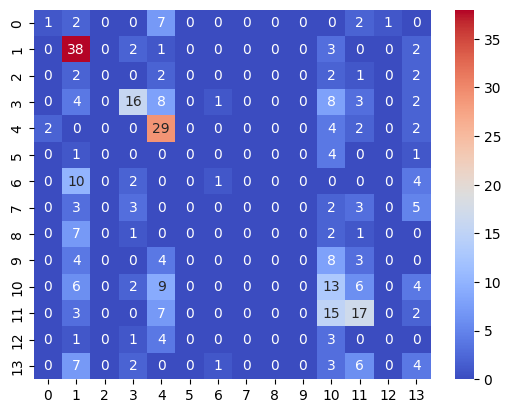

In [ ]:
plt.figure()
sns.heatmap(confusion_matrix(y_test, svc.predict(X_test)), annot = True, cmap = 'coolwarm')
plt.show()

In [ ]:
#Prewitt
print(classification_report(y_test_p, svc.predict(X_test_p)))

                         precision    recall  f1-score   support

          Aster Amellus       0.50      0.10      0.17        10
               Dianthus       0.28      0.68      0.40        34
   Evolvulus Alsinoides       0.00      0.00      0.00        11
      Helianthus Annuus       0.64      0.50      0.56        50
 Lavandula Angustifolia       0.36      0.65      0.47        43
     Lilium Longiflorum       0.00      0.00      0.00        10
  Pink Nelumbo Nucifera       0.33      0.11      0.17         9
            Pink Tulipa       0.00      0.00      0.00        20
Platycodon Grandiflorum       0.00      0.00      0.00        13
             Red Lilium       0.00      0.00      0.00        12
               Red Rosa       0.14      0.23      0.17        40
             Red Tulipa       0.28      0.32      0.30        38
   Tanacetum Parthenium       0.00      0.00      0.00        14
           White Tulipa       0.21      0.17      0.19        30

               accuracy

In [ ]:
#Scharr
print(classification_report(y_test_s, svc.predict(X_test_s)))

                         precision    recall  f1-score   support

          Aster Amellus       0.00      0.00      0.00        10
               Dianthus       0.29      0.65      0.40        34
   Evolvulus Alsinoides       0.00      0.00      0.00        11
      Helianthus Annuus       0.64      0.42      0.51        50
 Lavandula Angustifolia       0.47      0.51      0.49        43
     Lilium Longiflorum       0.00      0.00      0.00        10
  Pink Nelumbo Nucifera       0.50      0.11      0.18         9
            Pink Tulipa       0.00      0.00      0.00        20
Platycodon Grandiflorum       0.00      0.00      0.00        13
             Red Lilium       0.00      0.00      0.00        12
               Red Rosa       0.22      0.47      0.30        40
             Red Tulipa       0.24      0.34      0.28        38
   Tanacetum Parthenium       0.00      0.00      0.00        14
           White Tulipa       0.18      0.20      0.19        30

               accuracy

### Random Forest

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
#Sobel
print(classification_report(y_test, rf.predict(X_test)))

                         precision    recall  f1-score   support

          Aster Amellus       0.50      0.15      0.24        13
               Dianthus       0.63      0.89      0.74        46
   Evolvulus Alsinoides       0.67      0.22      0.33         9
      Helianthus Annuus       0.84      0.90      0.87        42
 Lavandula Angustifolia       0.51      0.87      0.64        39
     Lilium Longiflorum       0.50      0.17      0.25         6
  Pink Nelumbo Nucifera       0.67      0.24      0.35        17
            Pink Tulipa       0.40      0.12      0.19        16
Platycodon Grandiflorum       0.40      0.18      0.25        11
             Red Lilium       1.00      0.05      0.10        19
               Red Rosa       0.57      0.57      0.57        40
             Red Tulipa       0.53      0.75      0.62        44
   Tanacetum Parthenium       0.00      0.00      0.00         9
           White Tulipa       0.55      0.70      0.62        23

               accuracy

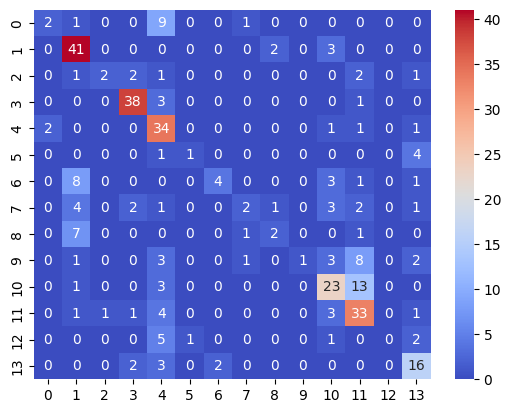

In [ ]:
plt.figure()
sns.heatmap(confusion_matrix(y_test, rf.predict(X_test)), annot = True, cmap = 'coolwarm')
plt.show()

In [ ]:
#Prewitt
print(classification_report(y_test_p, rf.predict(X_test_p)))

                         precision    recall  f1-score   support

          Aster Amellus       0.67      0.20      0.31        10
               Dianthus       0.53      0.79      0.64        34
   Evolvulus Alsinoides       1.00      0.36      0.53        11
      Helianthus Annuus       0.82      0.94      0.88        50
 Lavandula Angustifolia       0.52      0.81      0.64        43
     Lilium Longiflorum       0.12      0.10      0.11        10
  Pink Nelumbo Nucifera       0.33      0.22      0.27         9
            Pink Tulipa       1.00      0.20      0.33        20
Platycodon Grandiflorum       0.50      0.15      0.24        13
             Red Lilium       0.00      0.00      0.00        12
               Red Rosa       0.44      0.47      0.46        40
             Red Tulipa       0.57      0.63      0.60        38
   Tanacetum Parthenium       0.00      0.00      0.00        14
           White Tulipa       0.48      0.70      0.57        30

               accuracy

In [ ]:
#Scharr
print(classification_report(y_test_p, rf.predict(X_test_p)))

                         precision    recall  f1-score   support

          Aster Amellus       0.67      0.20      0.31        10
               Dianthus       0.53      0.79      0.64        34
   Evolvulus Alsinoides       0.67      0.18      0.29        11
      Helianthus Annuus       0.77      0.94      0.85        50
 Lavandula Angustifolia       0.55      0.81      0.65        43
     Lilium Longiflorum       0.00      0.00      0.00        10
  Pink Nelumbo Nucifera       0.33      0.22      0.27         9
            Pink Tulipa       0.67      0.20      0.31        20
Platycodon Grandiflorum       0.50      0.15      0.24        13
             Red Lilium       0.00      0.00      0.00        12
               Red Rosa       0.51      0.47      0.49        40
             Red Tulipa       0.58      0.66      0.62        38
   Tanacetum Parthenium       1.00      0.07      0.13        14
           White Tulipa       0.40      0.63      0.49        30

               accuracy

## Oversampled data

### SVM

In [ ]:
pipe_svc = make_pipeline(RandomOverSampler(sampling_strategy = 'auto', random_state = 0), SVC())
pipe_svc.fit(X_train, y_train)

Pipeline(steps=[('randomoversampler', RandomOverSampler(random_state=0)),
                ('svc', SVC())])

In [ ]:
#Sobell
print(classification_report(y_test, pipe_svc.predict(X_test)))

                         precision    recall  f1-score   support

          Aster Amellus       0.33      0.08      0.12        13
               Dianthus       0.44      0.52      0.48        46
   Evolvulus Alsinoides       0.17      0.22      0.19         9
      Helianthus Annuus       0.65      0.36      0.46        42
 Lavandula Angustifolia       0.43      0.72      0.54        39
     Lilium Longiflorum       0.08      0.17      0.11         6
  Pink Nelumbo Nucifera       0.20      0.29      0.24        17
            Pink Tulipa       0.15      0.25      0.19        16
Platycodon Grandiflorum       0.25      0.27      0.26        11
             Red Lilium       0.18      0.11      0.13        19
               Red Rosa       0.27      0.23      0.25        40
             Red Tulipa       0.39      0.34      0.37        44
   Tanacetum Parthenium       0.00      0.00      0.00         9
           White Tulipa       0.36      0.17      0.24        23

               accuracy

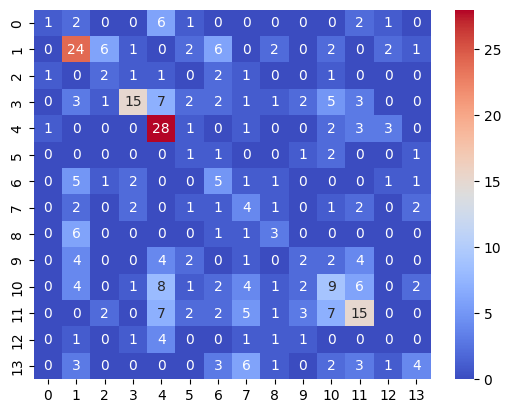

In [ ]:
plt.figure()
sns.heatmap(confusion_matrix(y_test, pipe_svc.predict(X_test)), annot = True, cmap = 'coolwarm')
plt.show()

In [ ]:
#Prewitt
print(classification_report(y_test_p, pipe_svc.predict(X_test_p)))

                         precision    recall  f1-score   support

          Aster Amellus       0.40      0.40      0.40        10
               Dianthus       0.36      0.44      0.39        34
   Evolvulus Alsinoides       0.25      0.27      0.26        11
      Helianthus Annuus       0.67      0.48      0.56        50
 Lavandula Angustifolia       0.38      0.58      0.46        43
     Lilium Longiflorum       0.00      0.00      0.00        10
  Pink Nelumbo Nucifera       0.13      0.22      0.17         9
            Pink Tulipa       0.30      0.35      0.33        20
Platycodon Grandiflorum       0.20      0.23      0.21        13
             Red Lilium       0.11      0.08      0.10        12
               Red Rosa       0.17      0.17      0.17        40
             Red Tulipa       0.38      0.32      0.34        38
   Tanacetum Parthenium       0.00      0.00      0.00        14
           White Tulipa       0.21      0.10      0.14        30

               accuracy

In [ ]:
#Scharr
print(classification_report(y_test_s, pipe_svc.predict(X_test_s)))

                         precision    recall  f1-score   support

          Aster Amellus       0.15      0.30      0.20        10
               Dianthus       0.40      0.53      0.46        34
   Evolvulus Alsinoides       0.33      0.27      0.30        11
      Helianthus Annuus       0.69      0.36      0.47        50
 Lavandula Angustifolia       0.50      0.42      0.46        43
     Lilium Longiflorum       0.04      0.10      0.06        10
  Pink Nelumbo Nucifera       0.14      0.22      0.17         9
            Pink Tulipa       0.28      0.25      0.26        20
Platycodon Grandiflorum       0.20      0.23      0.21        13
             Red Lilium       0.00      0.00      0.00        12
               Red Rosa       0.19      0.20      0.20        40
             Red Tulipa       0.26      0.29      0.27        38
   Tanacetum Parthenium       0.14      0.07      0.10        14
           White Tulipa       0.25      0.20      0.22        30

               accuracy

### Random Forest

In [ ]:
pipe_rf = make_pipeline(RandomOverSampler(sampling_strategy = 'auto', random_state = 0), RandomForestClassifier())
pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('randomoversampler', RandomOverSampler(random_state=0)),
                ('randomforestclassifier', RandomForestClassifier())])

In [ ]:
#Sobel
print(classification_report(y_test, pipe_rf.predict(X_test)))

                         precision    recall  f1-score   support

          Aster Amellus       0.56      0.38      0.45        13
               Dianthus       0.70      0.91      0.79        46
   Evolvulus Alsinoides       1.00      0.22      0.36         9
      Helianthus Annuus       0.78      0.83      0.80        42
 Lavandula Angustifolia       0.56      0.82      0.67        39
     Lilium Longiflorum       0.50      0.50      0.50         6
  Pink Nelumbo Nucifera       0.47      0.41      0.44        17
            Pink Tulipa       0.62      0.31      0.42        16
Platycodon Grandiflorum       0.67      0.55      0.60        11
             Red Lilium       0.00      0.00      0.00        19
               Red Rosa       0.53      0.62      0.57        40
             Red Tulipa       0.58      0.66      0.62        44
   Tanacetum Parthenium       0.00      0.00      0.00         9
           White Tulipa       0.58      0.61      0.60        23

               accuracy

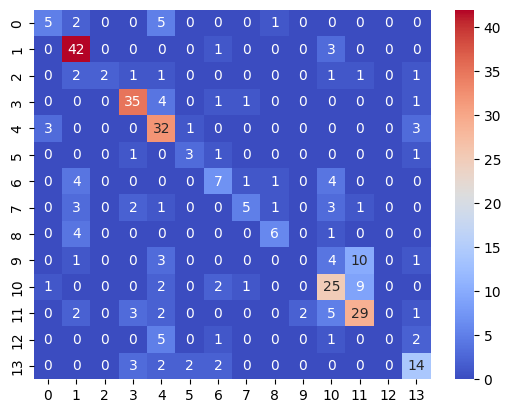

In [ ]:
plt.figure()
sns.heatmap(confusion_matrix(y_test, pipe_rf.predict(X_test)), annot = True, cmap = 'coolwarm')
plt.show()

In [ ]:
#Prewitt
print(classification_report(y_test_p, pipe_rf.predict(X_test_p)))

                         precision    recall  f1-score   support

          Aster Amellus       0.60      0.30      0.40        10
               Dianthus       0.58      0.74      0.65        34
   Evolvulus Alsinoides       0.60      0.27      0.37        11
      Helianthus Annuus       0.84      0.92      0.88        50
 Lavandula Angustifolia       0.56      0.81      0.66        43
     Lilium Longiflorum       0.13      0.20      0.16        10
  Pink Nelumbo Nucifera       0.33      0.11      0.17         9
            Pink Tulipa       0.80      0.40      0.53        20
Platycodon Grandiflorum       0.54      0.54      0.54        13
             Red Lilium       0.00      0.00      0.00        12
               Red Rosa       0.45      0.42      0.44        40
             Red Tulipa       0.55      0.55      0.55        38
   Tanacetum Parthenium       0.60      0.21      0.32        14
           White Tulipa       0.44      0.53      0.48        30

               accuracy

In [ ]:
#Scharr
print(classification_report(y_test_s, pipe_rf.predict(X_test_s)))

                         precision    recall  f1-score   support

          Aster Amellus       0.40      0.40      0.40        10
               Dianthus       0.59      0.76      0.67        34
   Evolvulus Alsinoides       0.80      0.36      0.50        11
      Helianthus Annuus       0.76      0.96      0.85        50
 Lavandula Angustifolia       0.64      0.70      0.67        43
     Lilium Longiflorum       0.11      0.20      0.14        10
  Pink Nelumbo Nucifera       0.60      0.33      0.43         9
            Pink Tulipa       0.54      0.35      0.42        20
Platycodon Grandiflorum       0.60      0.46      0.52        13
             Red Lilium       0.00      0.00      0.00        12
               Red Rosa       0.59      0.55      0.57        40
             Red Tulipa       0.63      0.68      0.66        38
   Tanacetum Parthenium       0.40      0.14      0.21        14
           White Tulipa       0.53      0.57      0.55        30

               accuracy